# Lab 13 - Linear Regression

## Kassie Bradshaw 07-17-2021

## My Data Set: Female Employment vs. Socioeconomic Factors

My hypothesis is that over the past 25 years, as the rate of women employed increases - the rate of women in agricultural jobs will decrease.


# Notebook Imports


In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Import the Data into a Pandas DataFrame


In [97]:
df = pd.read_csv('MLR2.csv')

# Show the description and info of the Data Set


In [98]:
df.head()

,PerFemEmploy,FertilityRate,RatioMaletoFemale,PerFemEmployers,Agriculture,Industry,Services,Wage&Salaried,ContrFamWorkers,OwnAccount,Vulnerable
0,24.30,3.71,28.33,0.1,84.79,7.66,7.56,18.03,66.80,15.07,81.87
1,24.57,3.59,28.72,0.1,82.28,7.46,10.27,18.38,66.39,15.14,81.52
2,24.82,3.48,29.18,0.1,81.19,7.57,11.24,18.74,65.95,15.21,81.16
3,25.11,3.37,29.67,0.1,80.28,7.77,11.95,19.11,65.53,15.26,80.79
4,25.38,3.27,30.17,0.1,79.52,8.12,12.36,19.50,65.01,15.39,80.40


In [99]:
df.tail()

,PerFemEmploy,FertilityRate,RatioMaletoFemale,PerFemEmployers,Agriculture,Industry,Services,Wage&Salaried,ContrFamWorkers,OwnAccount,Vulnerable
20,29.96,2.12,40.29,0.23,63.86,15.41,20.73,25.74,43.38,30.65,74.03
21,30.47,2.09,41.21,0.37,63.38,15.94,20.68,28.09,39.06,32.49,71.54
22,33.44,2.06,44.04,0.63,59.84,16.78,23.38,31.17,29.79,38.41,68.20
23,33.65,NaN,44.27,0.65,59.43,16.74,23.83,31.89,28.89,38.58,67.47
24,33.82,NaN,44.50,0.66,59.03,16.70,24.27,32.61,27.99,38.74,66.73


In [100]:
df.describe()

,PerFemEmploy,FertilityRate,RatioMaletoFemale,PerFemEmployers,Agriculture,Industry,Services,Wage&Salaried,ContrFamWorkers,OwnAccount,Vulnerable
count,25.000000,23.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,27.680800,2.711304,34.947600,0.196400,70.272400,12.018800,17.710400,21.965200,55.87240,21.968800,77.840400
std,2.842613,0.526535,5.068672,0.179325,7.795071,3.171068,4.709609,4.512734,12.38072,8.237512,4.674583
min,24.300000,2.060000,28.330000,0.090000,59.030000,7.460000,7.560000,16.560000,27.99000,15.070000,66.730000
25%,25.780000,2.250000,31.020000,0.100000,64.730000,9.010000,13.550000,19.110000,52.41000,15.520000,77.110000
50%,26.560000,2.600000,33.500000,0.120000,67.520000,12.620000,19.870000,20.810000,61.29000,17.480000,79.090000
75%,28.990000,3.120000,38.490000,0.160000,77.440000,14.420000,20.860000,22.780000,64.07000,26.470000,80.790000
max,33.820000,3.710000,44.500000,0.660000,84.790000,16.780000,24.270000,32.610000,66.80000,38.740000,83.270000


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PerFemEmploy       25 non-null     float64
 1   FertilityRate      23 non-null     float64
 2   RatioMaletoFemale  25 non-null     float64
 3   PerFemEmployers    25 non-null     float64
 4   Agriculture        25 non-null     float64
 5   Industry           25 non-null     float64
 6   Services           25 non-null     float64
 7   Wage&Salaried      25 non-null     float64
 8   ContrFamWorkers    25 non-null     float64
 9   OwnAccount         25 non-null     float64
 10  Vulnerable         25 non-null     float64
dtypes: float64(11)
memory usage: 2.3 KB


# Reshape the Data


In [102]:
X = df['Agriculture'].values
Y = df['PerFemEmploy'].values

# Women Working in Agriculture


In [103]:
X

array([84.79, 82.28, 81.19, 80.28, 79.52, 78.78, 77.44, 75.96, 74.28,
       72.48, 70.49, 68.19, 67.52, 66.86, 66.25, 65.53, 65.32, 65.02,
       64.73, 64.36, 63.86, 63.38, 59.84, 59.43, 59.03])

# Employment Rate of Women


In [104]:
Y

array([24.3 , 24.57, 24.82, 25.11, 25.38, 25.63, 25.78, 25.89, 25.96,
       25.89, 25.83, 26.11, 26.56, 27.  , 27.22, 28.56, 28.72, 28.87,
       28.99, 29.49, 29.96, 30.47, 33.44, 33.65, 33.82])

In [105]:
X = X.reshape(-1,1)
X

array([[84.79],
       [82.28],
       [81.19],
       [80.28],
       [79.52],
       [78.78],
       [77.44],
       [75.96],
       [74.28],
       [72.48],
       [70.49],
       [68.19],
       [67.52],
       [66.86],
       [66.25],
       [65.53],
       [65.32],
       [65.02],
       [64.73],
       [64.36],
       [63.86],
       [63.38],
       [59.84],
       [59.43],
       [59.03]])

In [106]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=.8, test_size=.2, random_state=100)

# Validate Shape of test/train data


In [107]:
print(f'X-Train Shape [{x_train.shape}]')

X-Train Shape [(20, 1)]


In [108]:
print(f'Y-Train Shape [{y_train.shape}]')

Y-Train Shape [(20,)]


In [109]:
print(f'X-Test Shape [{x_test.shape}]')

X-Test Shape [(5, 1)]


In [110]:
print(f'Y-Test Shape [{y_train.shape}]')

Y-Test Shape [(20,)]


# Plot Data


Text(0.5, 1.0, '25 Years of Female Employment')

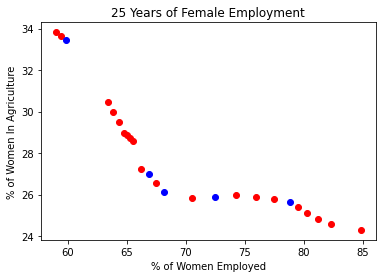

In [111]:
plt.scatter(x_train, y_train, color='red')
plt.scatter(x_test, y_test, color='blue')
plt.xlabel('% of Women Employed')
plt.ylabel('% of Women In Agriculture')
plt.title('25 Years of Female Employment')

# Linear Regression


In [112]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)

# Testing & Training Accuracy


In [113]:
print(f'Training Accuracy {round(lm.score(x_train, y_train) * 100,2)}%')
print(f'Test Accuracy {round(lm.score(x_test, y_test) * 100,2)}%')

Training Accuracy 81.42%
Test Accuracy 62.63%


Text(0.5, 1.0, "25 Years of Women's Employment")

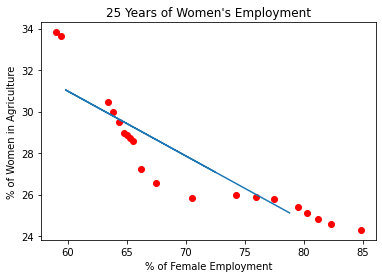

In [114]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_test, y_predict)
plt.xlabel('% of Female Employment')
plt.ylabel('% of Women in Agriculture')
plt.title('25 Years of Women\'s Employment')

# Conclusions

## 1. As female employment grew roughly 25% in 25 years, there was only about a 10% decrease in agriculture jobs

## 2. During the 15% increase of female employment (from 70% to 85%), women working in agriculture stayed fairly unchanged

## 3. The number of women in agricultural jobs fell rapidly at first, but the rate seems to be slowing down.
